# ABE 516x final project

## Brief introduction 
Our project sponsor requires us to provide a semi-annual updates of our monitoring results. Traditionally, new monitoring data was added into the existing dataset (or modification to existing dataset) and the same analyses were performed manually every six months. This repetitve process consumed a huge amount of time, which then led to the the motivation to automate the process. This goal of this project was to develop a consistent workflow to analyze the nutrient and sediment data and the associated parameters (i.e. flow, weather). <br>

The following program will allow any users to analyze the datasets using a consistent method, in addition to saving time from analyzing each dataset manually every time a modification is made to the dataset. <br>

The questions to be answered in this program are: <br>
a) Is analyte concentration higher in one catchment than the other? <br>
b) Is analyte load higher in one catchment than the other? <br> 
c) How does environmental factor (flow, precipitation, and temperature) affect analyte concentration and load? <br>

Additional data can be imported and additional analyses may be added in future development.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Part 1) Gathering data

In [2]:
# Import nutrient and flow data
data = pd.read_excel('BHL_data.xlsx', sheet_name='Data_by_sub')
data = data.rename(columns={'Sample date': 'Date', 'Flow (cms)':'Flow', 'DRP (mg P/L)':'DRP', 'TP (mg P/L)':'TP', 
                            'TSS (mg/L)':'TSS', 'Nitrate (mg/L)':'NOx', 'TN (mg/L)':'TN'})
data.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN
0,Sub11,2015-03-20,Base,0.0060,0.020,0.025,1.692308,50.9792,41.6
1,Sub11,2015-03-27,Base,0.0060,0.020,0.014,0.500000,48.7837,40.8
2,Sub11,2015-04-03,Base,0.0240,0.001,0.015,1.231527,45.4211,42.8
3,Sub11,2015-04-11,Base,0.0245,0.012,0.029,7.540395,46.5769,43.0
4,Sub11,2015-04-17,Base,0.0250,0.001,0.016,1.691729,48.2718,43.0


[See weather scrapping code here](Weather_scrapping.ipynb)

In [3]:
# exporting daily weather data csv file

weather_data = pd.read_csv('BHL_weather_data.csv')
weather_data.head()

,Date,precipMM,tempC
0,2015-01-01,0.0,-7.375
1,2015-01-02,0.0,-5.875
2,2015-01-03,0.0,-4.875
3,2015-01-04,1.3,-17.375
4,2015-01-05,0.3,-14.625


## Part 2: Preliminary analysis

In [4]:
# Split nutrient/flow dataset by site
data_11 = data[data['Site'] == 'Sub11']
data_12 = data[data['Site'] == 'Sub12']

### Time series plots

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


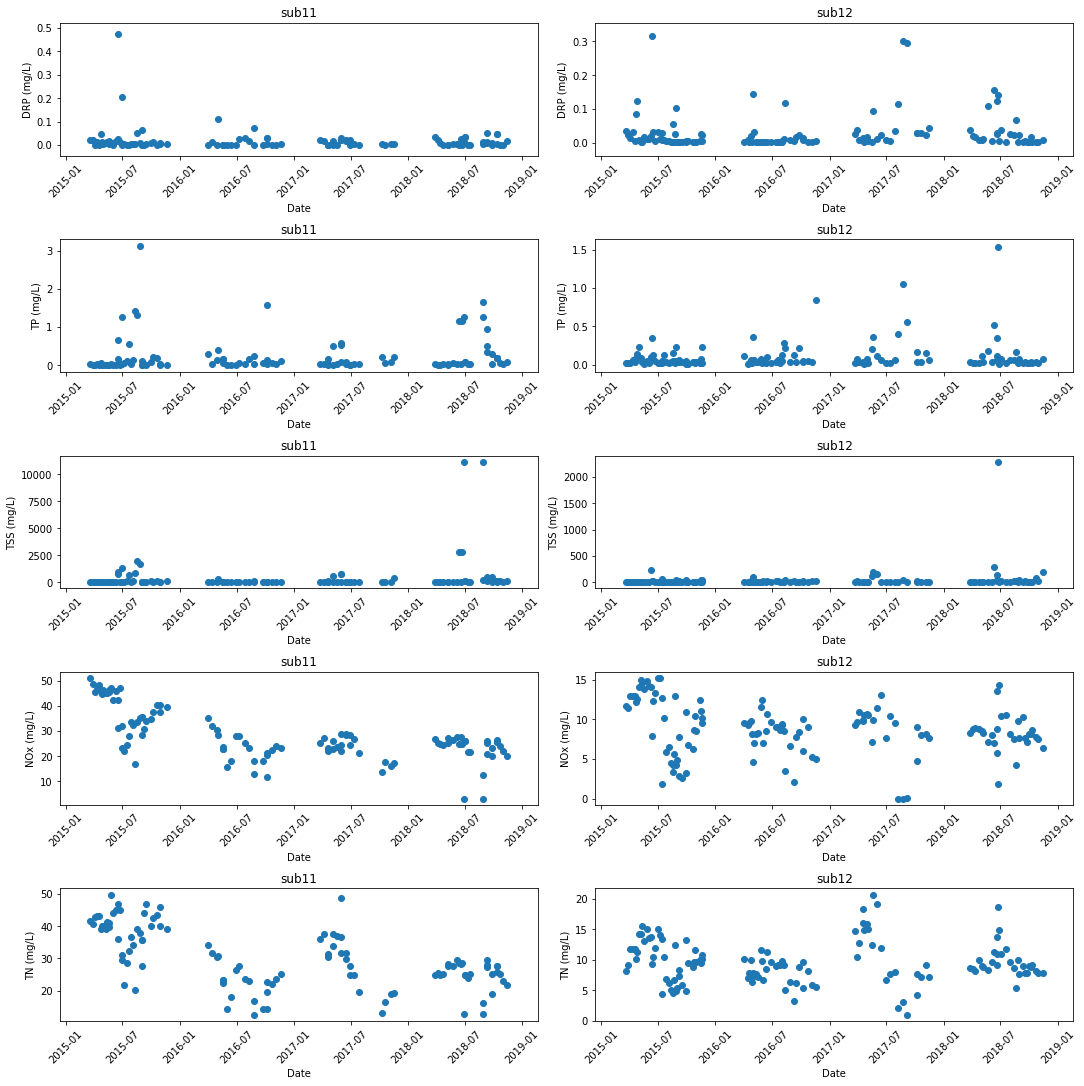

In [5]:
import matplotlib.pyplot as plt

list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']
i = 1

fig = plt.figure(figsize=(15,15))
#fig.subplots_adjust(bottom = 0)

for x in list_of_analytes:
    ax = fig.add_subplot(5,2,i)
    plt.scatter(data_11['Date'],data_11[x])
    plt.title('sub11')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(x + ' (mg/L)')
    i = i + 1
    
    
    ax = fig.add_subplot(5,2,i)
    plt.scatter(data_12['Date'],data_12[x])
    plt.title('sub12')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(x + ' (mg/L)')
    i = i + 1

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Descriptive analysis (all years)

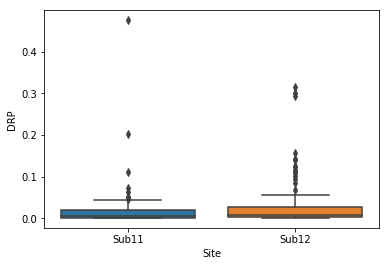

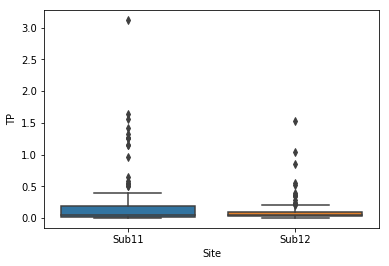

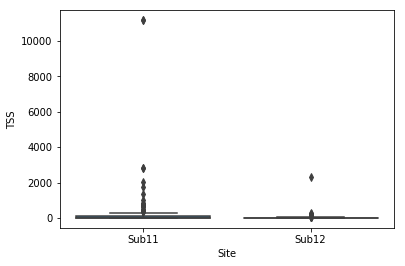

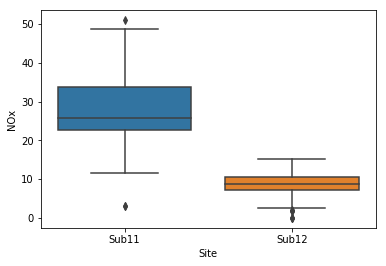

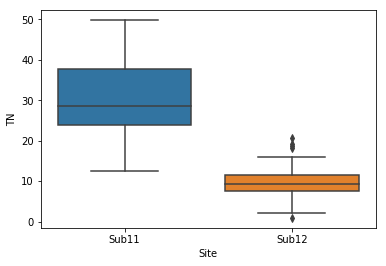

In [6]:
# quick snapshot on the dataset
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for x in list_of_analytes:
    ax = sns.boxplot(x='Site', y=x, data=data)
    plt.show()

In [7]:
data_11.describe()

,Flow,DRP,TP,TSS,NOx,TN
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.068453,0.018279,0.238041,396.900882,28.320551,30.174996
std,0.135658,0.050381,0.463947,1544.040251,9.923801,9.230618
min,0.000000,0.001000,0.001500,0.500000,3.051000,12.435000
25%,0.018121,0.001000,0.021500,8.333333,22.606350,23.841000
50%,0.036419,0.005000,0.047000,22.000000,25.850500,28.686000
75%,0.073765,0.019000,0.190000,116.500000,33.813550,37.663000
max,1.296460,0.475000,3.118000,11166.000000,50.979200,49.800000


In [8]:
data_12.describe()

,Flow,DRP,TP,TSS,NOx,TN
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.057473,0.028008,0.103682,41.648837,8.755039,9.546512
std,0.072552,0.053944,0.194234,204.343583,3.330117,3.501898
min,0.002000,0.001000,0.002000,0.500000,0.000000,0.900000
25%,0.020000,0.002000,0.025000,4.300000,7.200000,7.600000
50%,0.035000,0.008000,0.040000,8.900000,8.800000,9.200000
75%,0.068000,0.027000,0.098000,21.700000,10.600000,11.600000
max,0.555000,0.316000,1.535000,2284.400000,15.200000,20.700000


### Descriptive analysis (individual years)

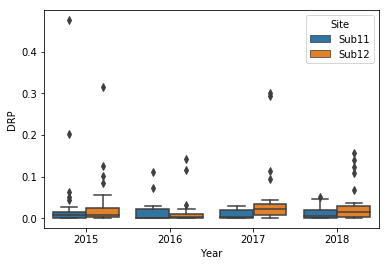

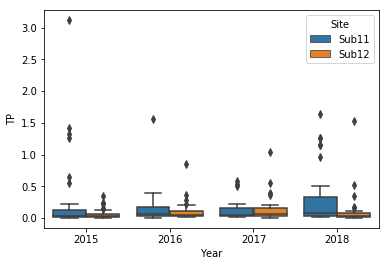

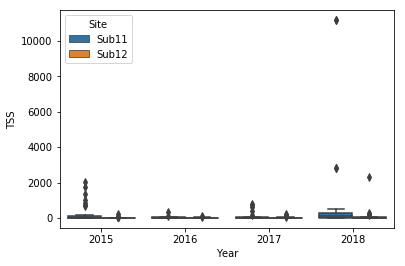

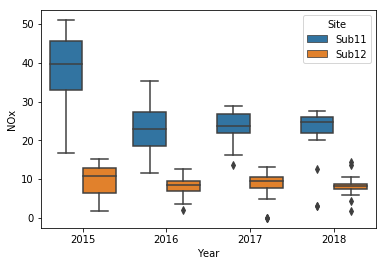

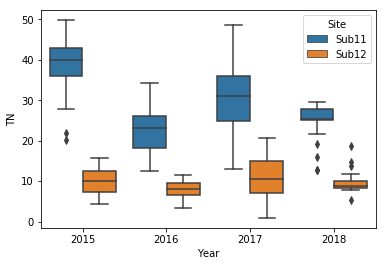

In [9]:
import datetime as dt
# extract year from date

data['Year'] = pd.DatetimeIndex(data['Date']).year
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for x in list_of_analytes:
    ax = sns.boxplot(x='Year', y=x, data=data, hue='Site')
    plt.show()

In [20]:
# I will  not show the mean, median, std of each subdataset because there are too many to show (total of 40)
# If user desires to know the basic stats of all years for a particular site and analyte, 
# the person can use the following prompt box

user_site = input("Choose sub11 or sub 12:")
#user_analyte = input ("Choose 'DRP', 'TP', 'TSS', 'NOx', or 'TN'")

if user_site == 'sub11':
    user_data = data[data['Site']=='Sub11']
    print(user_data.groupby('Year').describe())
elif user_site == 'sub12':
    user_data = data[data['Site']=='Sub12']
    print(user_data.groupby('Year').describe())
    

Choose sub11 or sub 12:sub11
      Flow                                                             \
     count      mean       std      min       25%       50%       75%   
Year                                                                    
2015  39.0  0.088571  0.218978  0.00000  0.017000  0.027000  0.052431   
2016  22.0  0.045804  0.052671  0.00079  0.016823  0.025576  0.061822   
2017  21.0  0.064987  0.048745  0.00600  0.024938  0.063933  0.095245   
2018  29.0  0.061091  0.049099  0.00890  0.021653  0.051614  0.085015   

                 DRP            ...       NOx             TN             \
           max count      mean  ...       75%      max count       mean   
Year                            ...                                       
2015  1.296460  39.0  0.027872  ...  45.54795  50.9792  39.0  38.741026   
2016  0.249518  22.0  0.015500  ...  27.27755  35.3001  22.0  22.738345   
2017  0.183644  21.0  0.010048  ...  26.90240  28.9470  21.0  29.406905   
2018  0.1